Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Change Directory to Working Directory

In [0]:
import os

os.chdir('/content/gdrive/My Drive/132A/Project')
!ls


 16QAM		     LLRs_4QAM_10.png   loss_16QAM_15.png   loss_BPSK_20.png
 4QAM		     LLRs_4QAM_15.png   loss_4QAM_10.png    Mixed
 BPSK		     LLRs_4QAM_20.png   loss_4QAM_15.png    Parameters.gsheet
'BPSK Trash Data'    LLRs_BPSK_10.png   loss_4QAM_20.png    Plots
 LLRs_16QAM_10.png   LLRs_BPSK_15.png   loss_BPSK_10.png
 LLRs_16QAM_15.png   LLRs_BPSK_20.png   loss_BPSK_15.png


Load Data

In [0]:
import numpy as np
import pandas as pd
import scipy.io as sio

def unison_shuffled_copies(a, b, c, d, e, f):
    assert (len(a) == len(b)) and (len(a) == len(c)) and (len(b) == len(c)) and (len(a)==len(d)) and (len(a)==len(e)) and (len(a)==len(f))
    p = np.random.permutation(len(a))
    return a[p], b[p], c[p], d[p], e[p], f[p]

sym_r = []
sym_i = []
LLR0 = []
LLR1 = []
LLR2 = []
LLR3 = []
for i in range(4):
  x = sio.loadmat('16QAM/Raw Data/10 dB/16QAM_sym_10_' + str(i+1) + '.mat')
  y0 = sio.loadmat('16QAM/Raw Data/10 dB/16QAM_LLR_b0_10_' + str(i+1) + '.mat')
  y1 = sio.loadmat('16QAM/Raw Data/10 dB/16QAM_LLR_b1_10_' + str(i+1) + '.mat')
  y2 = sio.loadmat('16QAM/Raw Data/10 dB/16QAM_LLR_b2_10_' + str(i+1) + '.mat')
  y3 = sio.loadmat('16QAM/Raw Data/10 dB/16QAM_LLR_b3_10_' + str(i+1) + '.mat')
  x_d = x['z_16QAM']
  LLR_b0 = y0['LLR_b0_16QAM']
  LLR_b1 = y1['LLR_b1_16QAM']
  LLR_b2 = y2['LLR_b2_16QAM']
  LLR_b3 = y3['LLR_b3_16QAM']
  sym_r.append(np.asarray(x_d.real.ravel())) 
  sym_i.append(np.asarray(x_d.imag.ravel())) 
  LLR0.append(np.asarray(LLR_b0.ravel())) 
  LLR1.append(np.asarray(LLR_b1.ravel())) 
  LLR2.append(np.asarray(LLR_b2.ravel())) 
  LLR3.append(np.asarray(LLR_b3.ravel())) 
  sym_r[i] = sym_r[i].reshape(1, -1)
  sym_i[i] = sym_i[i].reshape(1, -1)
  LLR0[i] = LLR0[i].reshape(1, -1)
  LLR1[i] = LLR1[i].reshape(1, -1)
  LLR2[i] = LLR2[i].reshape(1, -1)
  LLR3[i] = LLR3[i].reshape(1, -1)
  sym_r[i][0], sym_i[i][0], LLR0[i][0], LLR1[i][0], LLR2[i][0], LLR3[i][0] = unison_shuffled_copies(sym_r[i][0], sym_i[i][0], LLR0[i][0], LLR1[i][0], LLR2[i][0], LLR3[i][0])
  
print(sym_i[0])
print(LLR0[0])
print(LLR1[0])
print(LLR2[0])
print(LLR3[0])

[[ 1.26532143  1.14655604 -2.88068744 ...  1.23698248  2.98695778
   1.01704859]]
[[ 137.74189268  -45.10663382 -174.39193228 ...  -36.53082057
  -157.88510995   35.19345649]]
[[-28.87094634  34.89336618 -47.19596614 ...  43.46917943 -38.94255498
   44.80654351]]
[[  50.61285723   45.86224176 -150.45499558 ...   49.47929931
   158.9566226    40.68194344]]
[[ 29.38714277  34.13775824 -35.22749779 ...  30.52070069 -39.4783113
   39.31805656]]


In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Concatenate, BatchNormalization, Activation
from keras import optimizers
from keras.regularizers import l1

def llr_model():
    Nsym = 10000
    input1 = Input(shape=(Nsym,))
    input2 = Input(shape=(Nsym,))
    merged = Concatenate(axis=1)([input1, input2])

    dense1 = Dense(4096, kernel_initializer='truncated_normal', activation = 'relu')(merged)
    dropout1 = Dropout(0.1)(dense1)

    dense2 = Dense(2048, kernel_initializer='truncated_normal', activation = 'relu')(dropout1)
    dropout2 = Dropout(0.2)(dense2)

    dense3 = Dense(1024, kernel_initializer='truncated_normal', activation = 'relu')(dropout2)
    dropout3 = Dropout(0.3)(dense3)

    dense4 = Dense(512, kernel_initializer='truncated_normal', activation = 'relu')(dropout3)
    dropout4 = Dropout(0.3)(dense4)

    dense5 = Dense(256, kernel_initializer='truncated_normal', activation = 'relu')(dropout4)
    dropout5 = Dropout(0.4)(dense5)

    dense6 = Dense(128, kernel_initializer='truncated_normal', activation = 'relu')(dropout5)
    dropout6 = Dropout(0.5)(dense6)

    dense7 = Dense(512, kernel_initializer='truncated_normal', activation = 'relu')(dropout6)
    dropout7 = Dropout(0.6)(dense7)


    output0 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dropout7)
    output1 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dense7)
    output2 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dropout7)
    output3 = Dense(10000, kernel_initializer='truncated_normal', activation = 'linear')(dense7)

    model = Model(inputs=[input1, input2], output = [output0, output1, output2, output3])
    Adam=optimizers.Adam(lr=2.0, beta_1=0.9, beta_2=0.999, decay=0.99, amsgrad=False)
    model.compile(loss="mean_squared_logarithmic_error", optimizer = 'Adam', metrics = ["mean_squared_error"], target_tensors = None)
    
    return model


In [0]:
import keras
import h5py
import matplotlib.pyplot as plt

batchsize = 2**7  # training batch size
model = llr_model()

print (model.summary())

history = model.fit([sym_r[0], sym_i[0]], [LLR0[0], LLR1[0], LLR2[0], LLR3[0]], batch_size=batchsize, epochs = 500, validation_data = ([sym_r[1], sym_i[1]], [LLR0[1], LLR1[1], LLR2[1], LLR3[1]]), shuffle=True)

# Show performance
score = model.evaluate([sym_r[2], sym_i[2]], [LLR0[2], LLR1[2], LLR2[1], LLR3[1]], steps = batchsize)
print(score)

fig = plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.legend()
fig.savefig("loss_4QAM_10.png")
plt.close(fig)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 10000)        0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 10000)        0                                            
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 20000)        0           input_7[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
dense_29 (Dense)                (None, 4096)         81924096    concatenate_4[0][0]        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 1 samples, validate on 1 samples
Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 26.4630 - dense_36_loss: 7.8202 - dense_37_loss: 5.3994 - dense_38_loss: 7.7676 - dense_39_loss: 5.4759 - dense_36_mean_squared_error: 14070.4717 - dense_37_mean_squared_error: 1759.9720 - dense_38_mean_squared_error: 13954.2549 - dense_39_mean_squared_error: 1776.2061 - val_loss: 27.7794 - val_dense_36_loss: 8.1816 - val_dense_37_loss: 5.6223 - val_dense_38_loss: 8.3058 - val_dense_39_loss: 5.6698 - val_dense_36_mean_squared_error: 13729.6895 - val_dense_37_mean_squared_error: 1690.2460 - val_dense_38_mean_squared_error: 13682.5947 - val_dense_39_mean_squared_error: 1690.5276
Epoch 2/500
1/1 [==============================] - 0s 142ms/step - loss: 28.3365 - dense_36_loss: 8.5015 - dense_37_loss: 5.7657 - dense_38_loss: 8.3313 - dense_39_loss: 5.7379 - dense_36_mean_squared_error: 16458.1016 - dense_37_mean_squared_error: 2739.0513 - dense_38_mean_squared_error: 16104.1953 - 

1/1 [==============================] - 0s 276ms/step
[198.91873  -87.2969   -83.105896 ... -82.05647  -69.155624  88.81571 ]
[198.91873  -87.2969   -83.105896 ... -82.05647  -69.155624  88.81571 ]


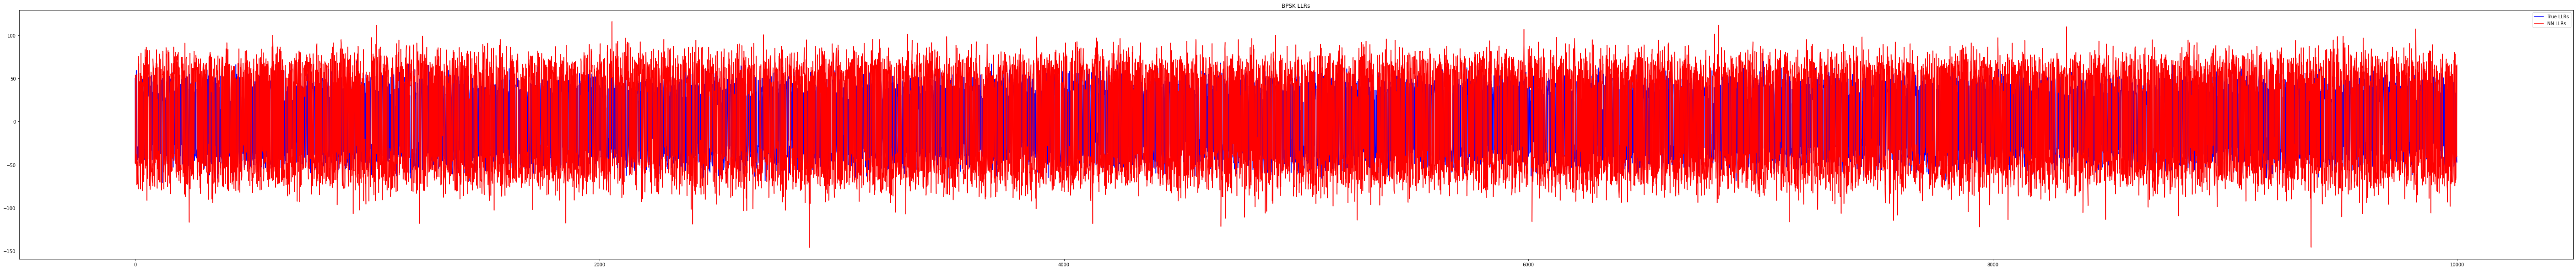

In [0]:
import matplotlib.pyplot as plt
#pred_llrs = model.predict(testset2)
fig = plt.figure(figsize=(100,10))
pred_llrs0, pred_llrs1, pred_llrs2, pred_llrs3 = model.predict([sym_r[3], sym_i[3]], verbose = 1, batch_size = None)
print (pred_llrs0[0])
print (pred_llrs0[0])
plt.plot(LLR1[3][0],'b', label = 'True LLRs')
plt.plot(pred_llrs1[0],'r', label = 'NN LLRs')
plt.title('BPSK LLRs')
plt.legend()
plt.show()
fig.savefig("LLRs_16QAM_10.png")

[198.91873  -87.2969   -83.105896 ... -82.05647  -69.155624  88.81571 ]
[  29.93306939  177.02124161  169.00056611 ... -172.39421131  160.11181552
 -174.66103628]


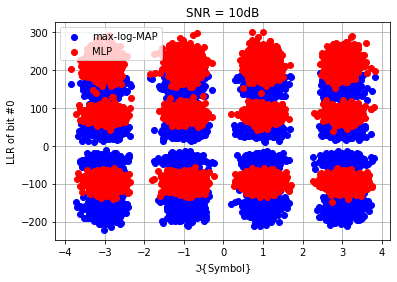

In [0]:
#print(pred_llrs[0])
#print(LLR[3][0])
print(pred_llrs0[0])
print(LLR0[3][0])
fig2 = plt.figure()
plt.grid(True)
plt.scatter(sym_i[3], LLR0[3], c='b', label = 'max-log-MAP',zorder=2)
plt.scatter(sym_i[3], pred_llrs0[0], c='r', label = 'MLP',zorder=3)
plt.ylabel('LLR of bit #0')
plt.xlabel(r'$\Im$' + '{Symbol}')
plt.title('SNR = 10dB')
plt.legend()
fig2.savefig("Plots/16QAM_LLR_b0_10.png")
plt.show()

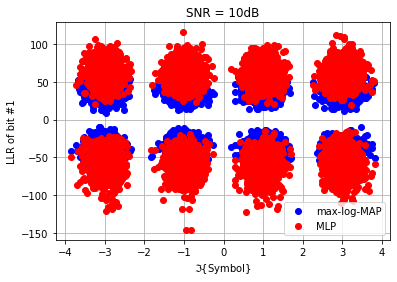

In [0]:
fig3 = plt.figure()
plt.grid(True)
plt.scatter(sym_i[3], LLR1[3], c='b', label = 'max-log-MAP',zorder=2)
plt.scatter(sym_i[3], pred_llrs1[0], c='r', label = 'MLP',zorder=3)
plt.ylabel('LLR of bit #1')
plt.xlabel(r'$\Im$' + '{Symbol}')
plt.title('SNR = 10dB')
plt.legend()
fig3.savefig("Plots/16QAM_LLR_b1_10.png")
plt.show()

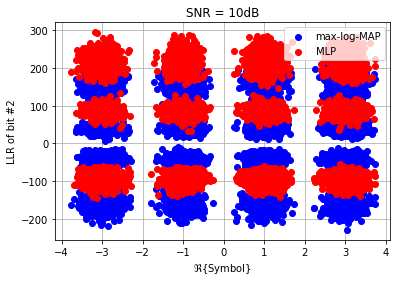

In [0]:
fig4 = plt.figure()
plt.grid(True)
plt.scatter(sym_r[3], LLR2[3], c='b', label = 'max-log-MAP',zorder=2)
plt.scatter(sym_r[3], pred_llrs2[0], c='r', label = 'MLP',zorder=3)
plt.ylabel('LLR of bit #2')
plt.xlabel(r'$\Re$' + '{Symbol}')
plt.title('SNR = 10dB')
plt.legend()
fig4.savefig("Plots/16QAM_LLR_b2_10.png")
plt.show()

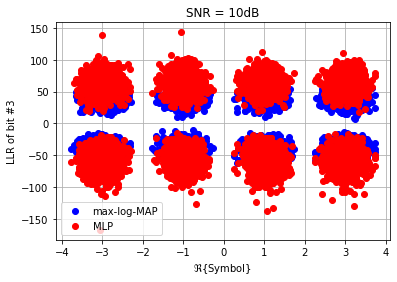

In [0]:
fig5 = plt.figure()
plt.grid(True)
plt.scatter(sym_r[3], LLR3[3], c='b', label = 'max-log-MAP',zorder=2)
plt.scatter(sym_r[3], pred_llrs3[0], c='r', label = 'MLP',zorder=3)
plt.ylabel('LLR of bit #3')
plt.xlabel(r'$\Re$' + '{Symbol}')
plt.title('SNR = 10dB')
plt.legend()
fig5.savefig("Plots/16QAM_LLR_b3_10.png")
plt.show()